In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
reviews = pd.read_csv("DisneylandReviews.csv", encoding='latin1')

In [17]:
reviews

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [18]:
reviews = reviews.dropna(subset=['Rating'])
def classify_review(rating):
    if rating >= 4:
        return "Good"
    elif rating == 3:
        return "Neutral"
    else:
        return "Bad"

In [19]:
reviews['Review_Class'] = reviews['Rating'].apply(classify_review)

In [20]:
print(reviews[['Rating', 'Review_Class']].head(10))

   Rating Review_Class
0       4         Good
1       4         Good
2       4         Good
3       4         Good
4       4         Good
5       3      Neutral
6       5         Good
7       3      Neutral
8       2          Bad
9       5         Good


In [21]:
reviews.to_csv("classified_disneyland_reviews.csv", index=False)

In [22]:
reviews

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Review_Class
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Good
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Good
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Good
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Good
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,Good
...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,Good
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,Good
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,Good
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,Good


In [23]:
reviews = reviews.dropna(subset=['Rating', 'Reviewer_Location', 'Year_Month'])

In [24]:
# Convert 'Year_Month' column to datetime format and set invalid dates as NaT
reviews['Year_Month'] = pd.to_datetime(reviews['Year_Month'], errors='coerce')

# Drop rows with NaT in 'Year_Month' column
reviews = reviews.dropna(subset=['Year_Month'])
reviews

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Review_Class
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Good
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Good
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Good
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Good
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,Good
...,...,...,...,...,...,...,...
42113,92198076,4,2011-01-01,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris,Good
42114,92061774,4,2011-01-01,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris,Good
42115,91995748,1,2010-12-01,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris,Bad
42116,91984642,2,2010-12-01,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris,Bad


In [25]:
# Set the style for the plots
sns.set(style="darkgrid")

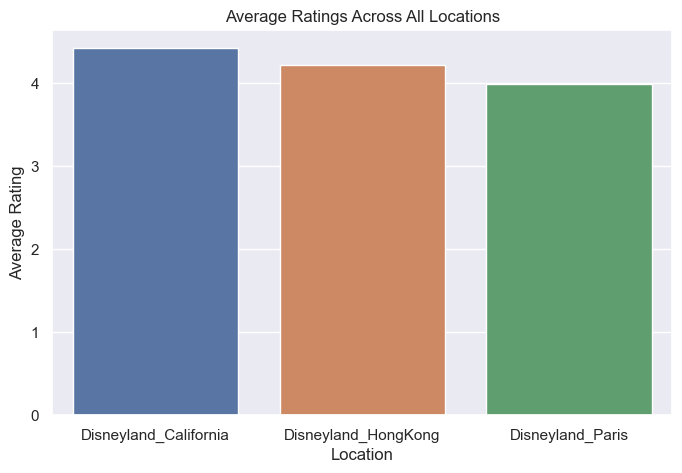

In [26]:
avg_ratings = reviews.groupby('Branch')['Rating'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Branch', y='Rating', data=avg_ratings)
plt.title('Average Ratings Across All Locations')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.show()

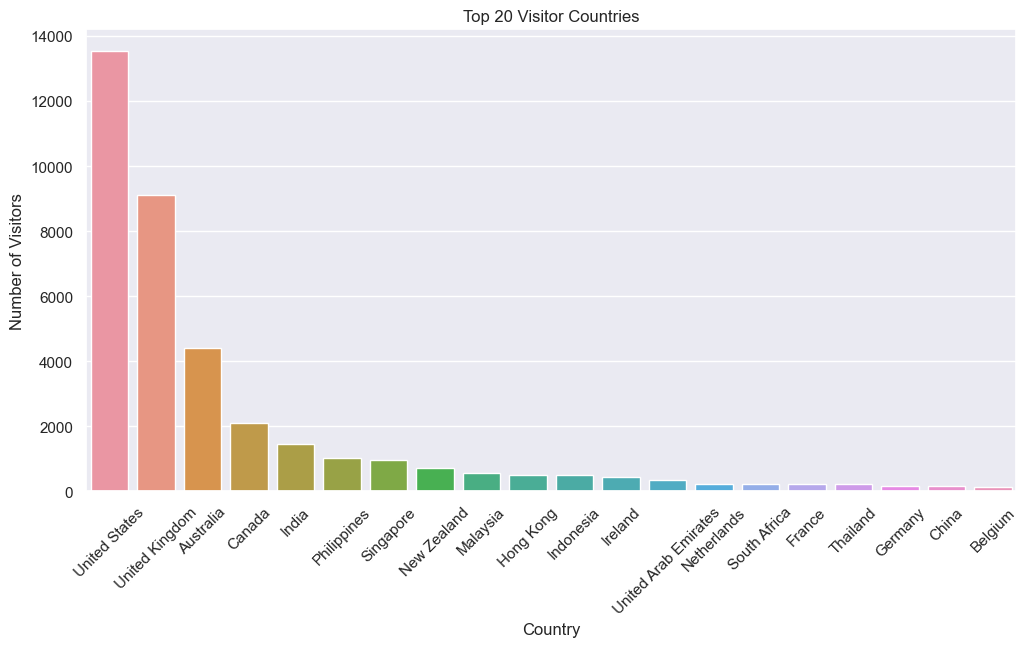

In [27]:
visitor_counts = reviews['Reviewer_Location'].value_counts().reset_index().rename(columns={'index': 'Country', 'Reviewer_Location': 'Count'})

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Count', data=visitor_counts.head(20))  # Plot the top 20 countries
plt.title('Top 20 Visitor Countries')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Number of Visitors')
plt.show()


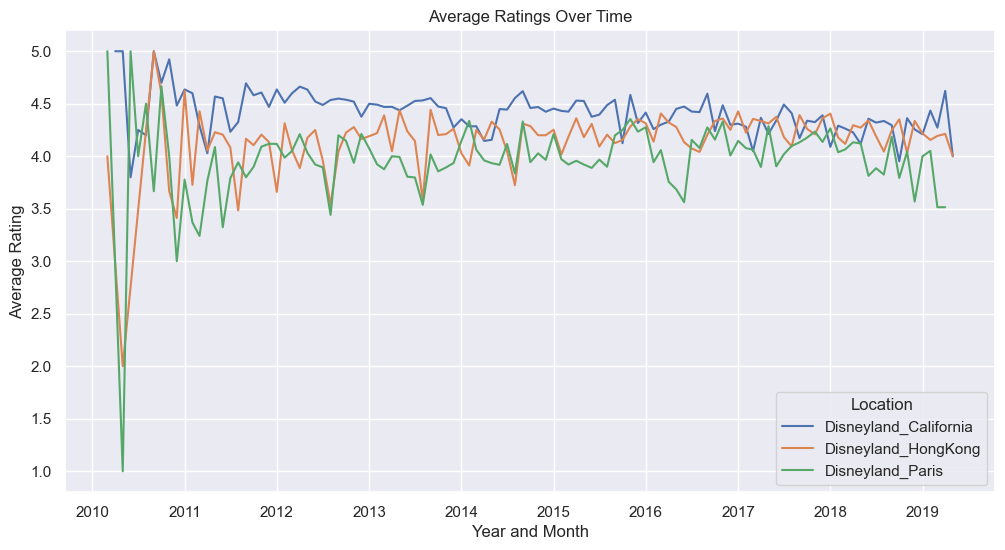

In [28]:
# Calculate monthly average ratings
monthly_avg_ratings = reviews.groupby(['Branch', 'Year_Month'])['Rating'].mean().reset_index()

# Plot the ratings over time for each location
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='Rating', hue='Branch', data=monthly_avg_ratings)
plt.title('Average Ratings Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Average Rating')
plt.legend(title='Location')
plt.show()
